In [204]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

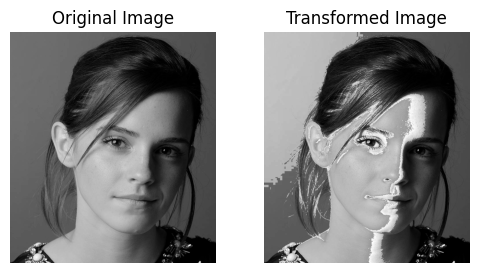

In [205]:
img = cv2.imread('a1images/emma.jpg', cv2.IMREAD_GRAYSCALE)

# Define the intensity transformation function
def intensity_transformation(input_intensity):
    if input_intensity < 100:
        return input_intensity  # Linear with slope 1
    elif input_intensity <= 150:
        return input_intensity*1.55 + 22.5 # Linear with slope 1.55 and intercept at 22.5
    else:
        return input_intensity  # Linear with slope 1

# Applying the intensity transformation to the image
transformed_img = np.zeros_like(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        transformed_img[i, j] = intensity_transformation(img[i, j])

# Plot the original and transformed images
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_img, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.show()


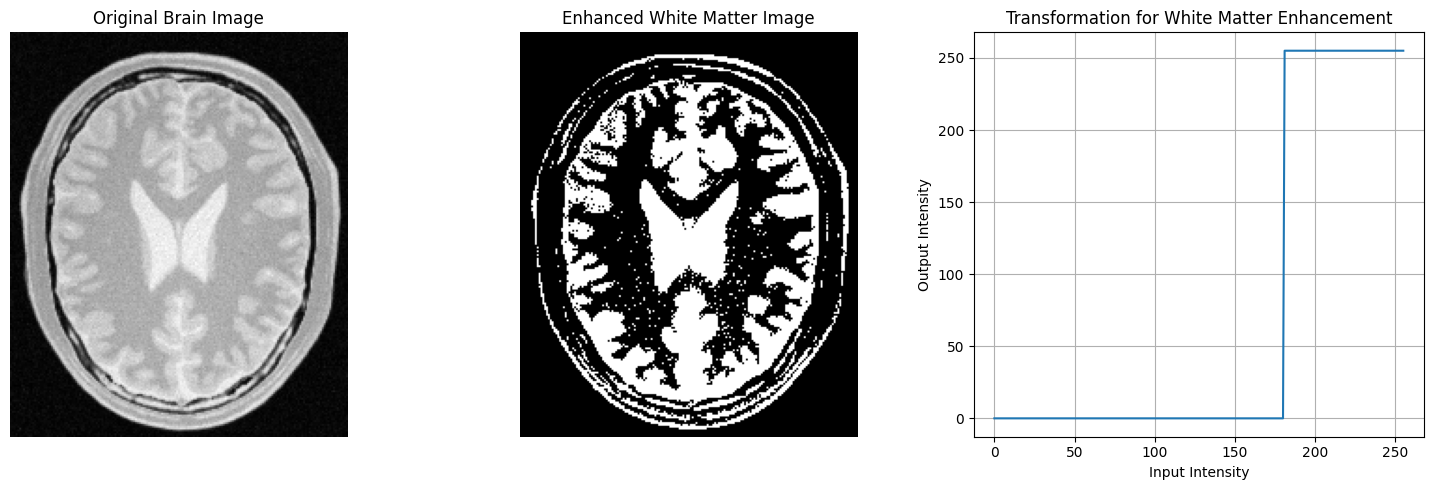

In [208]:
brain_image = cv2.imread('a1images/brain_proton_density_slice.png', cv2.IMREAD_GRAYSCALE)

# Transformation to enhance white matter contrast
low_range = np.linspace(0, 0, 181).astype('uint8')
high_range = np.linspace(255, 255, 75).astype('uint8')  # 255-180 = 75

# Combining the transformation
wm_transform = np.concatenate((low_range, high_range), axis=0).astype('uint8')
assert len(wm_transform) == 256  # Ensure the lookup table has 256 values

# Apply the transformation to the image
enhanced_image = cv2.LUT(brain_image, wm_transform)

# Plotting the original and transformed images along with the transformation plot
plt.figure(figsize=(15, 5))

# Displaying the original brain image
plt.subplot(1, 3, 1)
plt.imshow(brain_image, cmap='gray')
plt.title('Original Brain Image')
plt.axis('off')

# Displaying the enhanced image
plt.subplot(1, 3, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title('Enhanced White Matter Image')
plt.axis('off')

# Displaying the transformation curve
plt.subplot(1, 3, 3)
plt.plot(wm_transform)
plt.title('Transformation for White Matter Enhancement')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


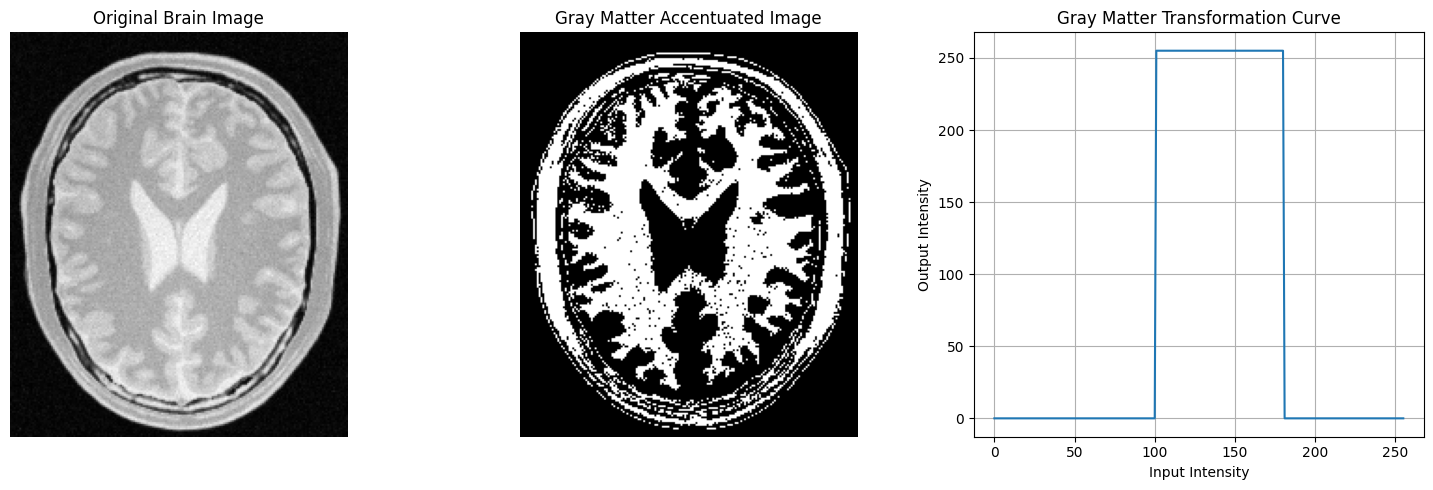

In [209]:
# Transformation to enhance gray matter contrast
range1 = np.linspace(0, 0, 101).astype('uint8')  # Intensities from 0 to 100 mapped to 0
range2 = np.linspace(255, 255, 80).astype('uint8')  # Intensities from 101 to 180 mapped to 255
range3 = np.linspace(0, 0, 75).astype('uint8')  # Intensities from 181 to 255 mapped to 0

# Combine the three ranges to form the lookup table
gray_transform = np.concatenate((range1, range2, range3), axis=0).astype('uint8')

# Ensure the lookup table has 256 values
assert len(gray_transform) == 256

# Apply the transformation to the brain image
gray_matter_accentuated = cv2.LUT(brain_image, gray_transform)

# Plot the original image and transformed result
plt.figure(figsize=(15, 5))

# Display the original brain image
plt.subplot(1, 3, 1)
plt.imshow(brain_image, cmap='gray')
plt.title('Original Brain Image')
plt.axis('off')

# Display the transformed (gray matter accentuated) image
plt.subplot(1, 3, 2)
plt.imshow(gray_matter_accentuated, cmap='gray')
plt.title('Gray Matter Accentuated Image')
plt.axis('off')

# Plot the transformation function
plt.subplot(1, 3, 3)
plt.plot(gray_transform)
plt.title('Gray Matter Transformation Curve')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)

# Show all plots
plt.tight_layout()
plt.show()


In [ ]:
#Transformation for gray matter accentuation
t1 = np.linspace(0, 0, 101-0).astype('uint8')
t2 = np.linspace(255, 255, 180 - 100).astype('uint8')
t3 = np.linspace(0, 0, 255 - 180).astype('uint8')

wm_transform = np.concatenate((t1, t2), axis=0).astype('uint8')
wm_transform = np.concatenate((wm_transform, t3), axis=0).astype('uint8')

assert len(wm_transform) == 256

transformed = cv.LUT(brain, wm_transform)
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(brain, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Transformed image
plt.subplot(1, 3, 2)
plt.imshow(transformed, cmap='gray')
plt.title('Gray Matter Accentuated Image')
plt.axis('off')


plt.subplot(1, 3, 3)
plt.plot(wm_transform, label=None)
plt.title("White Matter Transformation Plot")
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()
plt.show()

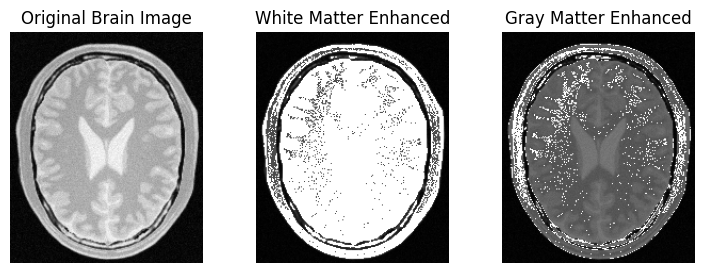

In [181]:
# Load the brain proton density image (Fig. 2)
brain_img = cv2.imread('a1images/brain_proton_density_slice.png', cv2.IMREAD_GRAYSCALE)

# Define intensity transformation for white and gray matter
# You may need to tune the values for white and gray matter intensity ranges based on the image

def transform_for_white_matter(input_intensity):
    if input_intensity >= 160:  # White matter is typically in higher intensity range
        return 255  # Enhance
    else:
        return input_intensity * 0.5  # Suppress

def transform_for_gray_matter(input_intensity):
    if 100 <= input_intensity < 160:  # Gray matter intensity range
        return 255  # Enhance
    else:
        return input_intensity * 0.5  # Suppress

# Apply transformations for both white and gray matter
white_matter_img = np.zeros_like(brain_img)
gray_matter_img = np.zeros_like(brain_img)

for i in range(brain_img.shape[0]):
    for j in range(brain_img.shape[1]):
        white_matter_img[i, j] = transform_for_white_matter(brain_img[i, j])
        gray_matter_img[i, j] = transform_for_gray_matter(brain_img[i, j])

# Plot the original and transformed images
plt.figure(figsize=(9, 3))

plt.subplot(1, 3, 1)
plt.imshow(brain_img, cmap='gray')
plt.title('Original Brain Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(white_matter_img, cmap='gray')
plt.title('White Matter Enhanced')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gray_matter_img, cmap='gray')
plt.title('Gray Matter Enhanced')
plt.axis('off')

plt.show()


#### 3.1

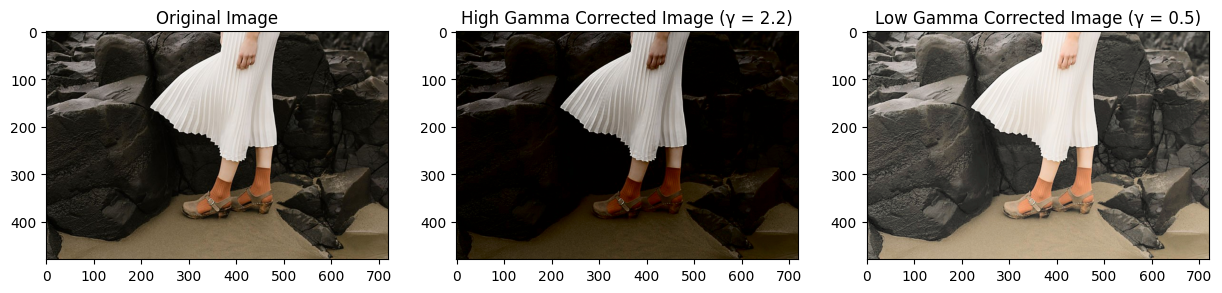

In [182]:
img = cv2.imread('a1images/highlights_and_shadows.jpg')

# Convert the image to L*a*b* color space
lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# Split L*, a*, and b* channels
L, a, b = cv2.split(lab_img)

# Apply gamma correction to the L channel (assume γ=2.2 for increased gamma and γ=0.5 for decreased gamma)
gamma_H = 2.2
gamma_L = 0.5
L_normalized = L / 255.0
L_gamma_H_corrected = np.power(L_normalized, gamma_H)
L_gamma_H_corrected = (L_gamma_H_corrected * 255).astype(np.uint8)

# Merge back the channels and convert to BGR
lab_img_corrected_H = cv2.merge([L_gamma_H_corrected, a, b])
gamma_H_corrected_img = cv2.cvtColor(lab_img_corrected_H, cv2.COLOR_LAB2BGR)

L_gamma_L_corrected = np.power(L_normalized, gamma_L)
L_gamma_L_corrected = (L_gamma_L_corrected * 255).astype(np.uint8)

# Merge back the channels and convert to BGR
lab_img_corrected_L = cv2.merge([L_gamma_L_corrected, a, b])
gamma_L_corrected_img = cv2.cvtColor(lab_img_corrected_L, cv2.COLOR_LAB2BGR)

# Display original and gamma-corrected images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(gamma_H_corrected_img, cv2.COLOR_BGR2RGB))
plt.title(f'High Gamma Corrected Image (γ = {gamma_H})')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(gamma_L_corrected_img, cv2.COLOR_BGR2RGB))
plt.title(f'Low Gamma Corrected Image (γ = {gamma_L})')

plt.show()


#### 3.2

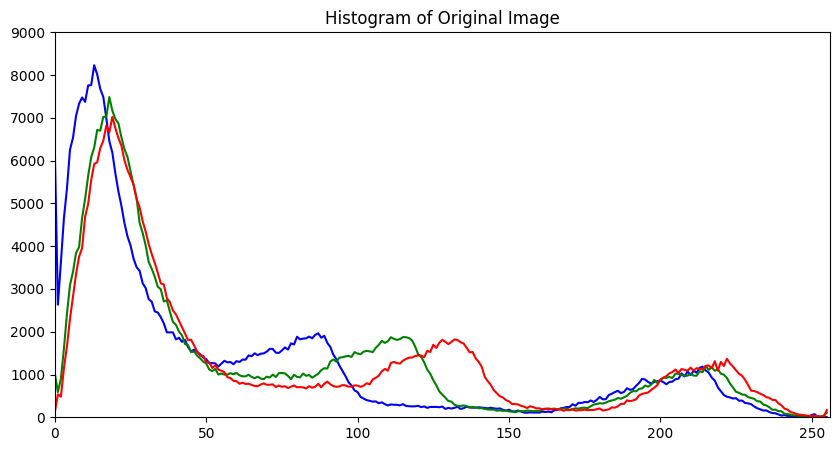

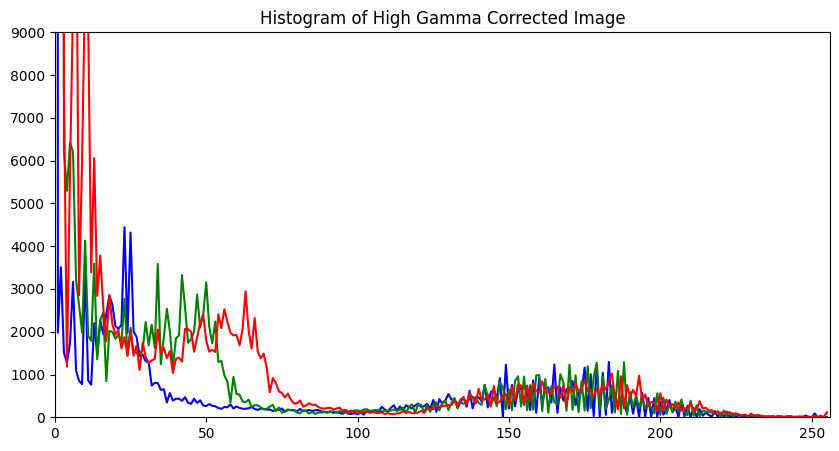

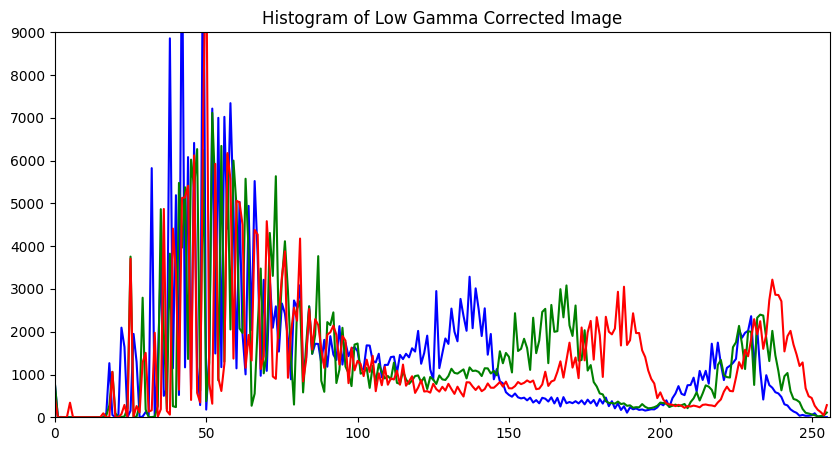

In [183]:
# Function to plot histograms
def plot_histograms(image, title):
    color = ('b', 'g', 'r')
    plt.figure(figsize=(10, 5))
    for i, col in enumerate(color):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
    plt.title(title)
    plt.xlim([0, 256])
    plt.ylim([0, 9000])

# Plot histograms of the original and gamma corrected images
plot_histograms(img, "Histogram of Original Image")
plot_histograms(gamma_H_corrected_img, "Histogram of High Gamma Corrected Image")
plot_histograms(gamma_L_corrected_img, "Histogram of Low Gamma Corrected Image")

plt.show()


#### 4.1

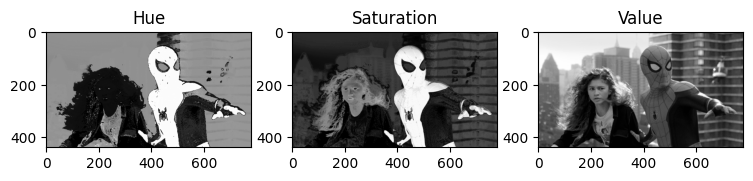

In [184]:
img_vibrance = cv2.imread('a1images/spider.png')

# Convert the image to HSV color space
hsv_img = cv2.cvtColor(img_vibrance, cv2.COLOR_BGR2HSV)

# Split the channels
h, s, v = cv2.split(hsv_img)

# Display each channel (Hue, Saturation, Value)
plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1)
plt.imshow(h, cmap='gray')
plt.title('Hue')

plt.subplot(1, 3, 2)
plt.imshow(s, cmap='gray')
plt.title('Saturation')

plt.subplot(1, 3, 3)
plt.imshow(v, cmap='gray')
plt.title('Value')

plt.show()

In [185]:
def vibrance_intensity_transformation(x, a, sigma=70):
    return np.minimum(x + a * 128 * np.exp(-(x - 128)**2 / (2 * sigma**2)), 255)

# Set a value for a
a = 0.5

# Apply the intensity transformation to the saturation channel
s_transformed = vibrance_intensity_transformation(s.astype(np.float64), a)



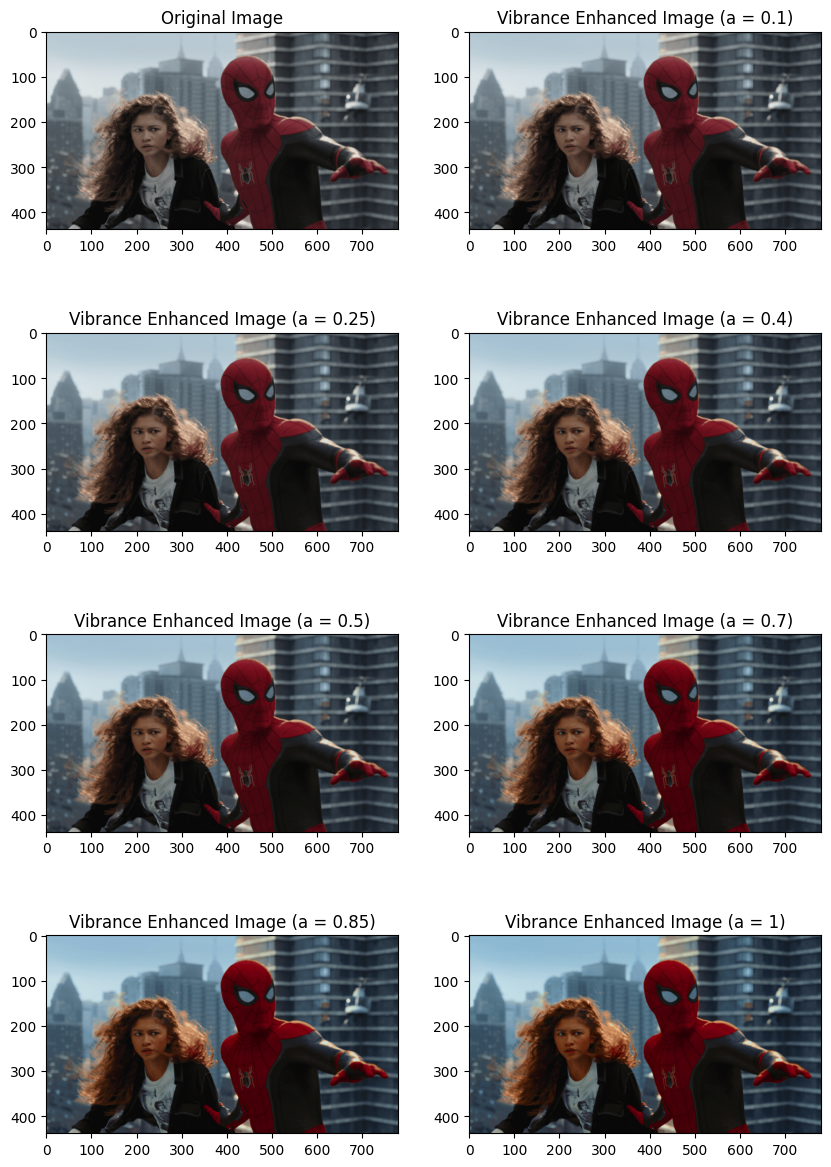

In [186]:
# Display original and vibrance-enhanced images
plt.figure(figsize=(10, 15))
plt.subplot(4, 2, 1)
plt.imshow(cv2.cvtColor(img_vibrance, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Apply the intensity transformation to the saturation channel for a = 0.1
s_transformed1 = vibrance_intensity_transformation(s.astype(np.float64), 0.1)

# Convert back to uint8
s_transformed1 = np.clip(s_transformed1, 0, 255).astype(np.uint8)
# Recombine the HSV channels
hsv_img_transformed1 = cv2.merge([h, s_transformed1, v])
# Convert back to BGR color space
vibrance_enhanced_img1 = cv2.cvtColor(hsv_img_transformed1, cv2.COLOR_HSV2BGR)

plt.subplot(4, 2, 2)
plt.imshow(cv2.cvtColor(vibrance_enhanced_img1, cv2.COLOR_BGR2RGB))
plt.title(f'Vibrance Enhanced Image (a = 0.1)')



# Apply the intensity transformation to the saturation channel for a = 0.25
s_transformed2 = vibrance_intensity_transformation(s.astype(np.float64), 0.25)

# Convert back to uint8
s_transformed2 = np.clip(s_transformed2, 0, 255).astype(np.uint8)
# Recombine the HSV channels
hsv_img_transformed2 = cv2.merge([h, s_transformed2, v])
# Convert back to BGR color space
vibrance_enhanced_img2 = cv2.cvtColor(hsv_img_transformed2, cv2.COLOR_HSV2BGR)

plt.subplot(4, 2, 3)
plt.imshow(cv2.cvtColor(vibrance_enhanced_img2, cv2.COLOR_BGR2RGB))
plt.title(f'Vibrance Enhanced Image (a = 0.25)')


# Apply the intensity transformation to the saturation channel for a = 0.4
s_transformed3 = vibrance_intensity_transformation(s.astype(np.float64), 0.4)

# Convert back to uint8
s_transformed3 = np.clip(s_transformed3, 0, 255).astype(np.uint8)
# Recombine the HSV channels
hsv_img_transformed3 = cv2.merge([h, s_transformed3, v])
# Convert back to BGR color space
vibrance_enhanced_img3 = cv2.cvtColor(hsv_img_transformed3, cv2.COLOR_HSV2BGR)

plt.subplot(4, 2, 4)
plt.imshow(cv2.cvtColor(vibrance_enhanced_img3, cv2.COLOR_BGR2RGB))
plt.title(f'Vibrance Enhanced Image (a = 0.4)')


# Apply the intensity transformation to the saturation channel for a = 0.5
s_transformed4 = vibrance_intensity_transformation(s.astype(np.float64), 0.5)

# Convert back to uint8
s_transformed4 = np.clip(s_transformed4, 0, 255).astype(np.uint8)
# Recombine the HSV channels
hsv_img_transformed4 = cv2.merge([h, s_transformed4, v])
# Convert back to BGR color space
vibrance_enhanced_img4 = cv2.cvtColor(hsv_img_transformed4, cv2.COLOR_HSV2BGR)

plt.subplot(4, 2, 5)
plt.imshow(cv2.cvtColor(vibrance_enhanced_img4, cv2.COLOR_BGR2RGB))
plt.title(f'Vibrance Enhanced Image (a = 0.5)')


# Apply the intensity transformation to the saturation channel for a = 0.7
s_transformed5 = vibrance_intensity_transformation(s.astype(np.float64), 0.7)

# Convert back to uint8
s_transformed5 = np.clip(s_transformed5, 0, 255).astype(np.uint8)
# Recombine the HSV channels
hsv_img_transformed5 = cv2.merge([h, s_transformed5, v])
# Convert back to BGR color space
vibrance_enhanced_img5 = cv2.cvtColor(hsv_img_transformed5, cv2.COLOR_HSV2BGR)

plt.subplot(4, 2, 6)
plt.imshow(cv2.cvtColor(vibrance_enhanced_img5, cv2.COLOR_BGR2RGB))
plt.title(f'Vibrance Enhanced Image (a = 0.7)')


# Apply the intensity transformation to the saturation channel for a = 0.85
s_transformed6 = vibrance_intensity_transformation(s.astype(np.float64), 0.85)

# Convert back to uint8
s_transformed6 = np.clip(s_transformed6, 0, 255).astype(np.uint8)
# Recombine the HSV channels
hsv_img_transformed6 = cv2.merge([h, s_transformed6, v])
# Convert back to BGR color space
vibrance_enhanced_img6 = cv2.cvtColor(hsv_img_transformed6, cv2.COLOR_HSV2BGR)

plt.subplot(4, 2, 7)
plt.imshow(cv2.cvtColor(vibrance_enhanced_img6, cv2.COLOR_BGR2RGB))
plt.title(f'Vibrance Enhanced Image (a = 0.85)')


# Apply the intensity transformation to the saturation channel for a = 1
s_transformed7 = vibrance_intensity_transformation(s.astype(np.float64), 1)

# Convert back to uint8
s_transformed7 = np.clip(s_transformed7, 0, 255).astype(np.uint8)
# Recombine the HSV channels
hsv_img_transformed7 = cv2.merge([h, s_transformed7, v])
# Convert back to BGR color space
vibrance_enhanced_img7 = cv2.cvtColor(hsv_img_transformed7, cv2.COLOR_HSV2BGR)

plt.subplot(4, 2, 8)
plt.imshow(cv2.cvtColor(vibrance_enhanced_img7, cv2.COLOR_BGR2RGB))
plt.title(f'Vibrance Enhanced Image (a = 1)')




plt.show()

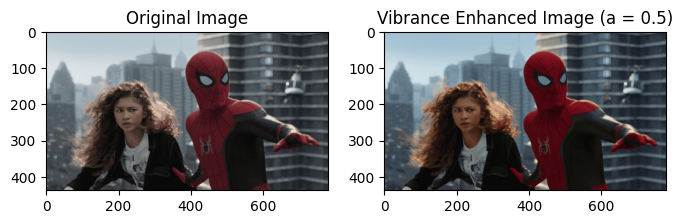

In [187]:

# Convert back to uint8
s_transformed = np.clip(s_transformed, 0, 255).astype(np.uint8)

# Recombine the HSV channels
hsv_img_transformed = cv2.merge([h, s_transformed, v])

# Convert back to BGR color space
vibrance_enhanced_img = cv2.cvtColor(hsv_img_transformed, cv2.COLOR_HSV2BGR)

# Display original and vibrance-enhanced images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_vibrance, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(vibrance_enhanced_img, cv2.COLOR_BGR2RGB))
plt.title(f'Vibrance Enhanced Image (a = {a})')

plt.show()

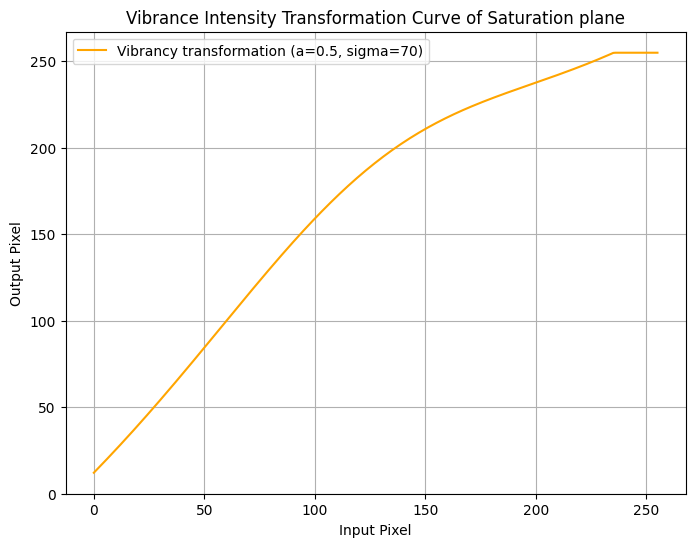

In [188]:
a = 0.5
sigma = 70

# Generate a range of input pixel vslue ranging from 0 to 255
input_values = np.arange(0, 256)

# Apply the intensity transformation to each pixel
output_values = [vibrance_intensity_transformation(x, a, sigma) for x in input_values]

# Plot the transformation
plt.figure(figsize=(8, 6))
plt.plot(input_values, output_values, label=f'Vibrancy transformation (a={a}, sigma={sigma})', color='orange')
plt.xlabel('Input Pixel')
plt.ylabel('Output Pixel')
plt.title('Vibrance Intensity Transformation Curve of Saturation plane')
plt.legend()
plt.grid(True)
plt.show()

#### 5

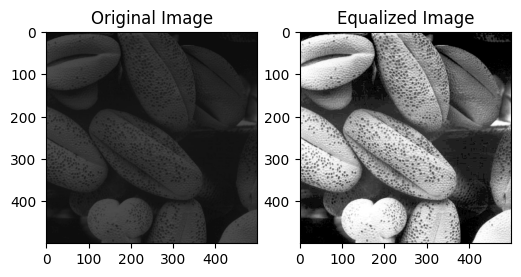

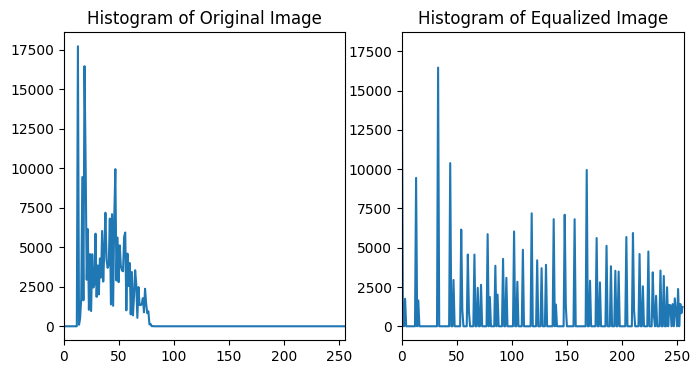

In [189]:
# Load the image (Figure 5)
img_hist_eq = cv2.imread('a1images/shells.tif', cv2.IMREAD_GRAYSCALE)


# Apply histogram equalization
equalized_img = cv2.equalizeHist(img_hist_eq)


Original_img = cv2.cvtColor(img_hist_eq, cv2.COLOR_BGR2RGB)

# Display original and equalized images
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)

plt.imshow(Original_img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')

plt.show()

# Function to plot histograms
def plot_gray_histogram(image, title):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.title(title)
    plt.xlim([0, 256])

# Plot histograms
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_gray_histogram(img_hist_eq, "Histogram of Original Image")


plt.subplot(1, 2, 2)
plot_gray_histogram(equalized_img, "Histogram of Equalized Image")

plt.show()


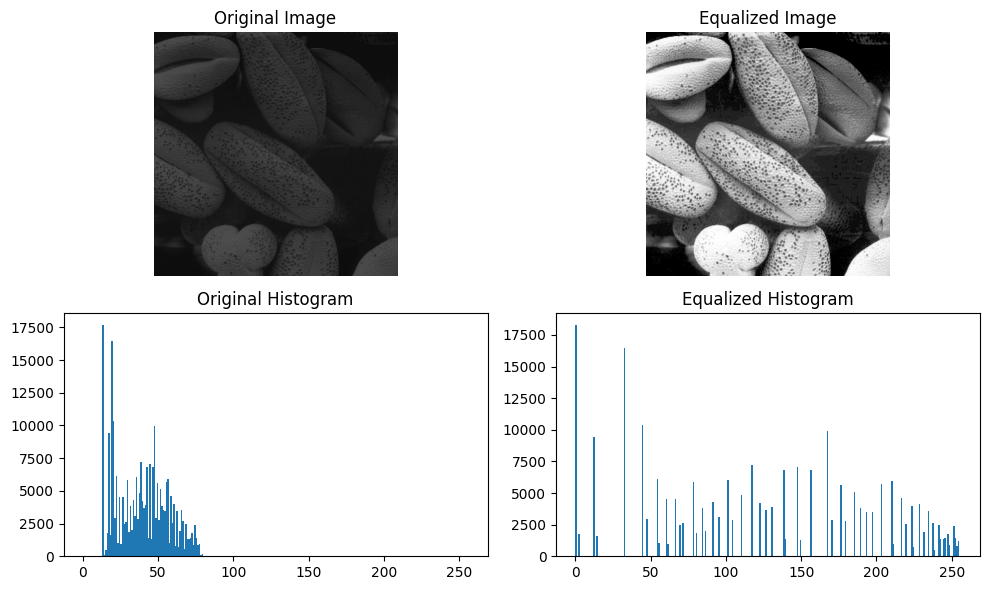

In [190]:
def histogram_equalization(image):
    """Apply histogram equalization to a grayscale image."""
    hist, _ = np.histogram(image.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = np.ma.masked_equal(cdf, 0)
    cdf_normalized = (cdf_normalized - cdf_normalized.min()) * 255 / (cdf_normalized.max() - cdf_normalized.min())
    return np.ma.filled(cdf_normalized, 0).astype('uint8')[image]

    
original_img = cv2.imread("a1images/shells.tif", cv2.IMREAD_GRAYSCALE)
equalized_img = histogram_equalization(original_img)

fig, axs = plt.subplots(2, 2, figsize=(10, 6))

axs[0, 0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB), cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[1, 0].hist(original_img.flatten(), 256, [0, 256])
axs[1, 0].set_title('Original Histogram')
# axs[1, 1].set_ylim([0, 50000])
# axs[1, 1].set_xlim([0, 250])

axs[0, 1].imshow(cv2.cvtColor(equalized_img, cv2.COLOR_BGR2RGB), cmap='gray')
axs[0, 1].set_title('Equalized Image')
axs[0, 1].axis('off')

axs[1, 1].hist(equalized_img.flatten(), 256, [0, 256])
axs[1, 1].set_title('Equalized Histogram')
# axs[1, 1].set_ylim([0, 17500])

plt.tight_layout()
plt.show()

#### 6.1

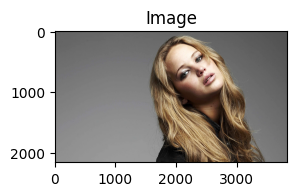

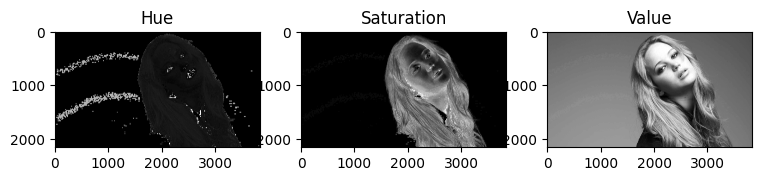

In [191]:
# Load the image
image = cv2.imread('a1images/jeniffer.jpg')  # Replace with actual image path

# Convert the image to HSV
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split into hue, saturation, and value planes
h2, s2, v2 = cv2.split(image_rgb)


plt.figure(figsize=(3, 2))
plt.subplot(1, 1, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image')
plt.show()

# Display each channel (Hue, Saturation, Value)
plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1)
plt.imshow(h2, cmap='gray')
plt.title('Hue')

plt.subplot(1, 3, 2)
plt.imshow(s2, cmap='gray')
plt.title('Saturation')

plt.subplot(1, 3, 3)
plt.imshow(v2, cmap='gray')
plt.title('Value')

plt.show()

#### 6.2

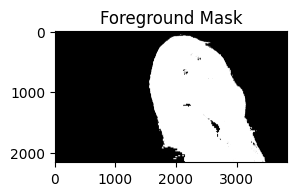

In [192]:
# Threshold the value plane to create a mask for the foreground
_, mask = cv2.threshold(s2, 13, 255, cv2.THRESH_BINARY)  # Adjust the threshold value as needed

# Display the binary mask using Matplotlib
plt.figure(figsize=(3, 2))
plt.imshow(mask, cmap='gray')
plt.title('Foreground Mask')
plt.show()


#### 6.3

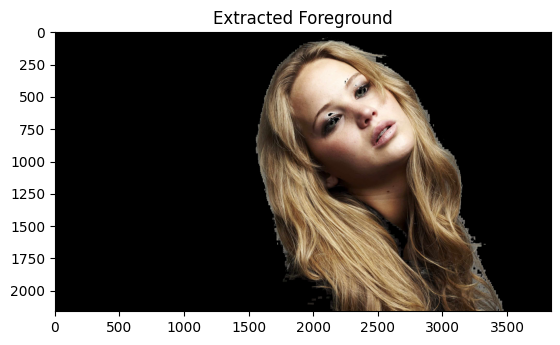

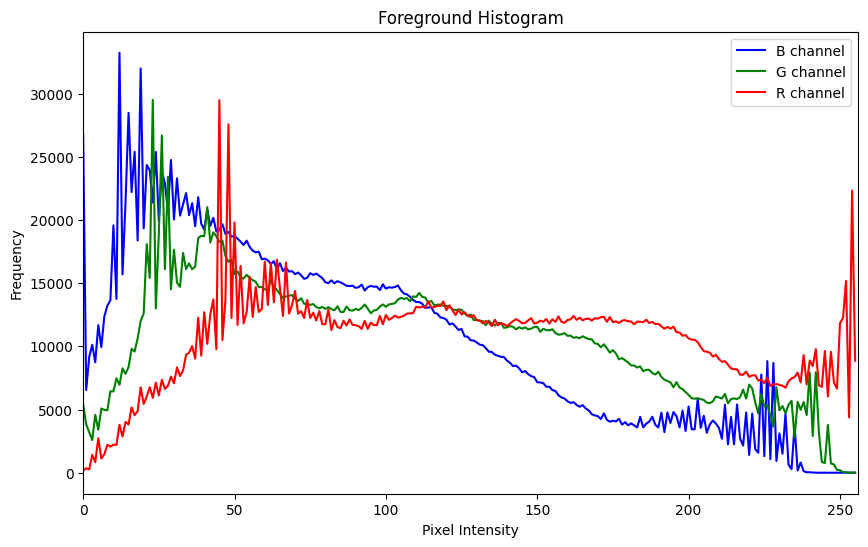

In [193]:
# Extract the foreground using the mask
foreground = cv2.bitwise_and(image, image, mask=mask)

def plot_rgb_histogram(img, msk):
    """Computes and plots the R, G, B histograms of an image."""
      
    # Split the image into Red, Green, and Blue channels
    channels = cv2.split(img)
    colors = ('b', 'g', 'r')  # OpenCV uses BGR by default
    
    # Initialize the plot
    plt.figure(figsize=(10, 6))
    plt.title('Foreground Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    # Calculate and plot the histogram for each channel
    for i, color in enumerate(colors):
        hist = cv2.calcHist([image], [i], msk, [256], [0, 256])
        plt.plot(hist, color=color, label=f'{color.upper()} channel')
        plt.xlim([0, 256])  # Set x-axis limit from 0 to 255 (pixel values)

    plt.legend()
    plt.show()
    


# Display the extracted foreground
#plt.figure(figsize=(6, 4))
plt.subplot(1, 1, 1)
plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))
plt.title('Extracted Foreground')
plt.show()

plot_rgb_histogram(foreground, mask)

#### 6.4

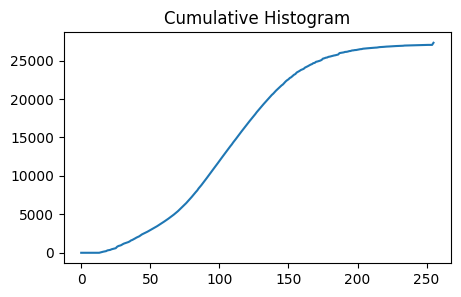

In [194]:
# Compute the cumulative sum of the histogram
cumsum_hist = np.cumsum(hist)

# Normalize the cumulative sum
cumsum_hist = cumsum_hist * hist.max() / cumsum_hist.max()

# Plot the cumulative histogram using Matplotlib
plt.figure(figsize=(5, 3))
plt.plot(cumsum_hist)
plt.title('Cumulative Histogram')
plt.show()


#### 6.5

In [236]:
def equalize_foreground_value(image, saturation_threshold=13):
    """Performs histogram equalization on the foreground value channel of an image. """
    # Convert the original image from BGR to HSV color space
    hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Split the HSV image into its respective channels
    hue_channel = hsv_img[:, :, 0]
    saturation_channel = hsv_img[:, :, 1]
    value_channel = hsv_img[:, :, 2]

    # Create a mask for the foreground based on the saturation channel
    foreground_mask = saturation_channel > saturation_threshold

    # Isolate the foreground in the value plane
    foreground_value = cv2.bitwise_and(value_channel, value_channel, mask=foreground_mask.astype(np.uint8))

    # Calculate the histogram for the value channel
    hist_v = cv2.calcHist([foreground_value], [0], foreground_mask.astype(np.uint8), [256], [0, 256])

    # Compute the cumulative histogram of the value channel
    cumulative_hist_v = np.cumsum(hist_v)

    # Count the number of pixels in the foreground
    pixel_count = foreground_mask.astype(np.uint8).sum()

    # Generate a look-up table (LUT) for histogram equalization
    lut_v = ((cumulative_hist_v / pixel_count) * 255).astype(np.uint8)

    # Apply the equalized LUT to the foreground's value channel
    equalized_value = cv2.LUT(foreground_value, lut_v)

    # Combine the equalized value channel with the original hue and saturation channels
    equalized_hsv_img = cv2.merge((hue_channel, saturation_channel, equalized_value))

    # Convert the equalized HSV image back to BGR color space
    equalized_bgr_img = cv2.cvtColor(equalized_hsv_img, cv2.COLOR_HSV2BGR)

    return equalized_bgr_img

equalized_foreground_img = equalize_foreground_value(foreground)

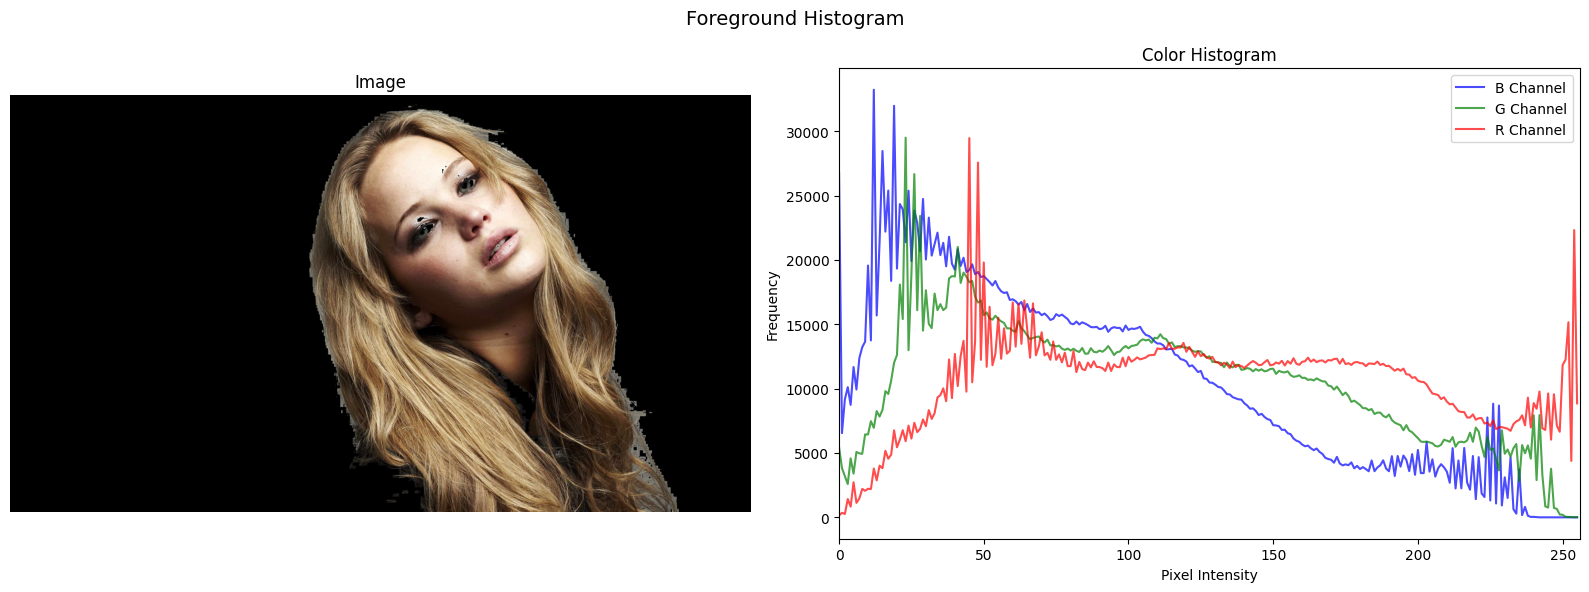

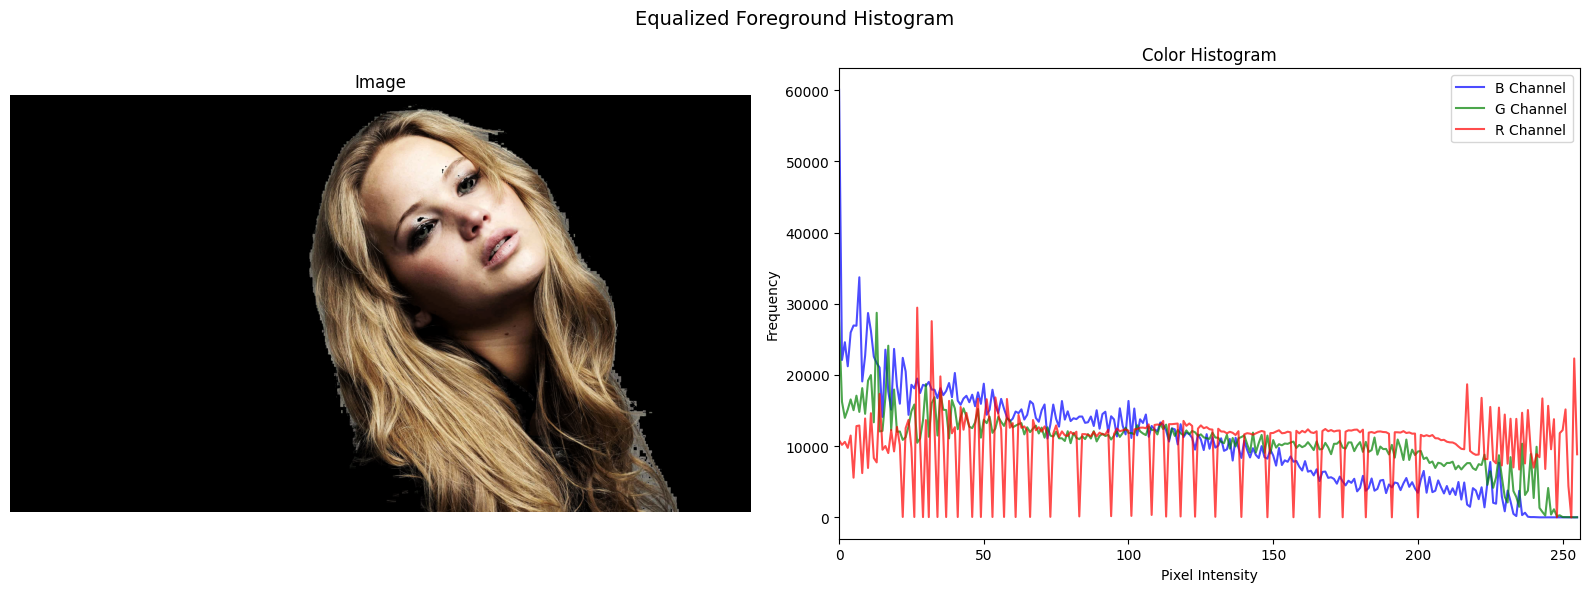

In [237]:
def display_image_histogram(image, mask=None, title="Image Histogram"):
    is_color = len(image.shape) == 3 and image.shape[2] == 3
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(title, fontsize=14)
    
    # Show image
    ax1.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB) if is_color else image, cmap='gray')
    ax1.set_title("Image")
    ax1.axis('off')
    
    # Compute and display histogram
    channels = ('b', 'g', 'r') if is_color else ('gray',)
    for i, color in enumerate(channels):
        hist = cv.calcHist([image], [i] if is_color else [0], mask, [256], [0, 256])
        ax2.plot(hist, color=color, alpha=0.7, label=f'{color.upper()} Channel' if is_color else None)
    
    ax2.set_title(f"{'Color' if is_color else 'Grayscale'} Histogram")
    ax2.set_xlim([0, 256])
    ax2.set_xlabel('Pixel Intensity')
    ax2.set_ylabel('Frequency')
    if is_color:
        ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
display_image_histogram(foreground, mask=mask.astype(np.uint8), title="Foreground Histogram")
display_image_histogram(equalized_foreground_img, mask=mask.astype(np.uint8), title="Equalized Foreground Histogram")


#### 6.6

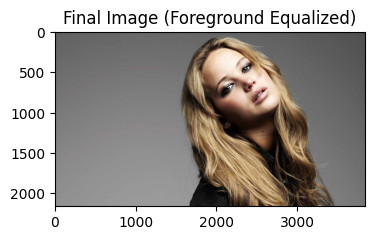

In [239]:
# Invert the mask to get the background
background_mask = cv2.bitwise_not(mask)

# Extract the background
background = cv2.bitwise_and(image, image, mask=background_mask)

equalized_foreground = image_rgb = cv2.cvtColor(equalized_foreground_img, cv2.COLOR_BGR2RGB) 

# Combine the histogram-equalized foreground and background
combined_image = cv2.add(equalized_foreground, background)

# Display the final combined image using Matplotlib
plt.figure(figsize=(4, 3))
plt.imshow(combined_image)
plt.title('Final Image (Foreground Equalized)')
plt.show()


#### 7.1

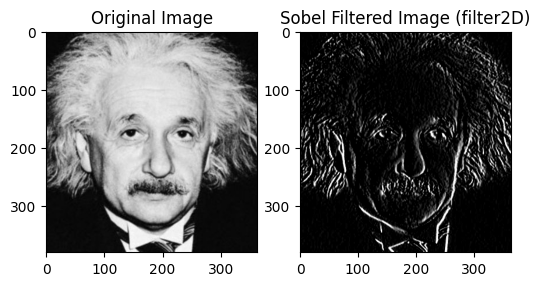

In [134]:
img_sobel = cv2.imread('a1images/einstein.png', cv2.IMREAD_GRAYSCALE)

# Define the Sobel kernel for x-direction
sobel_kernel_x = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])

# Apply filter2D with the Sobel kernel
sobel_filtered = cv2.filter2D(img_sobel, -1, sobel_kernel_x)

# Display the original and Sobel filtered images
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(img_sobel, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(sobel_filtered, cmap='gray')
plt.title('Sobel Filtered Image (filter2D)')

plt.show()


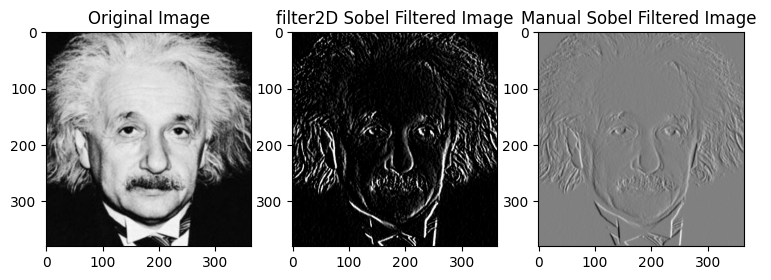

In [135]:
# Function for manual convolution
def apply_convolution(image, kernel):
    kernel_h, kernel_w = kernel.shape
    img_h, img_w = image.shape
    output = np.zeros((img_h, img_w))
    
    # Pad the image to handle edge cases
    padded_img = np.pad(image, ((1, 1), (1, 1)), 'constant')
    
    for i in range(1, img_h):
        for j in range(1, img_w):
            region = padded_img[i-1:i+2, j-1:j+2]
            output[i-1, j-1] = np.sum(region * kernel)
    
    return output

# Apply manual Sobel filter in x-direction
sobel_manual_filtered = apply_convolution(img_sobel, sobel_kernel_x)

# Display the result
plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1)
plt.imshow(img_sobel, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(sobel_filtered, cmap='gray')
plt.title('filter2D Sobel Filtered Image')

plt.subplot(1, 3, 3)
plt.imshow(sobel_manual_filtered, cmap='gray')
plt.title('Manual Sobel Filtered Image ')

plt.show()


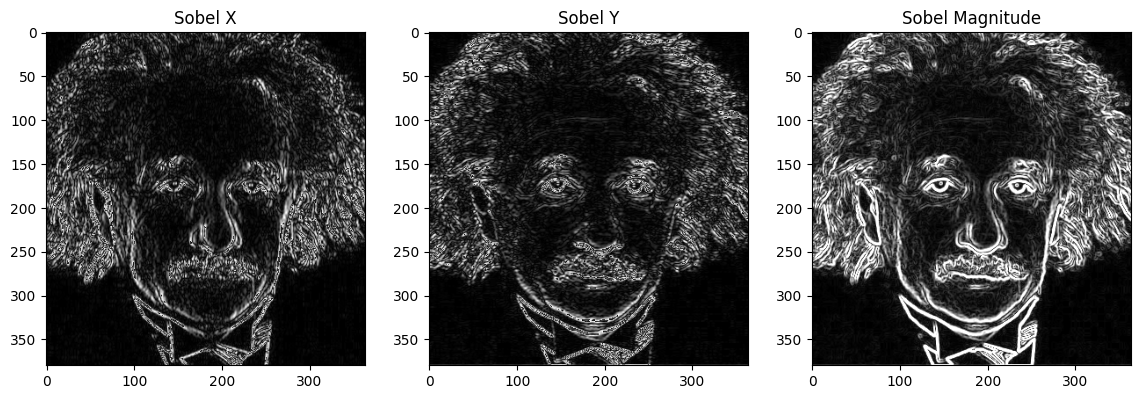

In [215]:
def apply_convolution(image, kernel):
    """Apply a convolution operation using the specified kernel."""
    kernel_h, kernel_w = kernel.shape
    img_h, img_w = image.shape
    output = np.zeros((img_h, img_w))
    
    # Pad the image to handle edge cases
    padded_img = np.pad(image, ((1, 1), (1, 1)), 'constant')
    
    for i in range(1, img_h + 1):
        for j in range(1, img_w + 1):
            region = padded_img[i-1:i+2, j-1:j+2]
            output[i-1, j-1] = np.sum(region * kernel)
    
    return output

def sobel_filter(img):
    """Apply Sobel filter to compute X, Y gradients and their magnitude."""
    # Define Sobel kernels for X and Y direction
    kernel_x = np.array([[1, 0, -1],
                         [2, 0, -2],
                         [1, 0, -1]])
    
    kernel_y = np.array([[1, 2, 1],
                         [0, 0, 0],
                         [-1, -2, -1]])

    # Apply convolution with Sobel kernels
    sobel_x = apply_convolution(img, kernel_x)
    sobel_y = apply_convolution(img, kernel_y)

    # Compute the magnitude of the gradient
    sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    sobel_magnitude = np.clip(sobel_magnitude, 0, 255) 
    
    sobel_x = np.uint8(np.abs(sobel_x))
    sobel_y = np.uint8(np.abs(sobel_y))
    sobel_magnitude = np.uint8(sobel_magnitude)

    return sobel_x, sobel_y, sobel_magnitude


sobel_x_result, sobel_y_result, sobel_magnitude_result = sobel_filter(img_sobel)

# Displaying the results
plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
plt.imshow(sobel_x_result, cmap='gray')
plt.title('Sobel X')

plt.subplot(1, 3, 2)
plt.imshow(sobel_y_result, cmap='gray')
plt.title('Sobel Y')

plt.subplot(1, 3, 3)
plt.imshow(sobel_magnitude_result, cmap='gray')
plt.title('Sobel Magnitude')

plt.show()


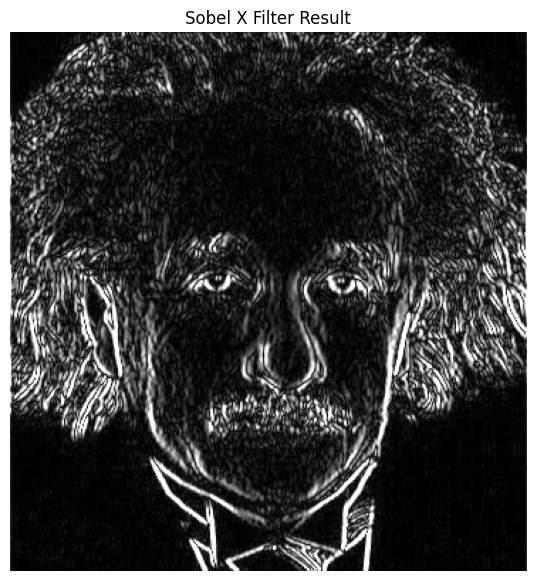

In [212]:
def sobel_x_filter(image):
    """Apply Sobel X filter for horizontal edge detection."""
    sobel_kernel = np.array([[1, 0, -1],
                             [2, 0, -2],
                             [1, 0, -1]])

    sobel_x_result = np.zeros_like(image, dtype=np.float64)

    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant')

    # Convolve with the Sobel kernel
    for x in range(1, padded_image.shape[0] - 1):
        for y in range(1, padded_image.shape[1] - 1):
            region = padded_image[x-1:x+2, y-1:y+2]
            sobel_x_result[x-1, y-1] = np.sum(sobel_kernel * region)

    return np.uint8(np.clip(np.abs(sobel_x_result), 0, 255))


# input_img should be defined before calling the function
sobel_x_output = sobel_x_filter(img_sobel)

# Display the result
plt.figure(figsize=(7, 7))
plt.imshow(sobel_x_output, cmap='gray')
plt.title('Sobel X Filter Result')
plt.axis('off')
plt.show()


#### 8

### Zooming Functions

#### Nearest-Neighbor Interpolation

In [136]:
def nearest_neighbor_zoom(image, scale_factor):
    # Use cv2 to perform nearest neighbor interpolation
    height, width = image.shape[:2]
    new_dimensions = (int(width * scale_factor), int(height * scale_factor))
    
    # Resizing with INTER_NEAREST for nearest-neighbor interpolation
    resized_image = cv2.resize(image, new_dimensions, interpolation=cv2.INTER_NEAREST)
    
    return resized_image


#### Bilinear Interpolation

In [137]:
def bilinear_zoom(image, scale_factor):
    # Use cv2 to perform bilinear interpolation
    height, width = image.shape[:2]
    new_dimensions = (int(width * scale_factor), int(height * scale_factor))
    
    # Resizing with INTER_LINEAR for bilinear interpolation
    resized_image = cv2.resize(image, new_dimensions, interpolation=cv2.INTER_LINEAR)
    
    return resized_image

### Computing Normalized Sum of Squared Differences (SSD)

In [138]:
def compute_normalized_ssd(original_image, scaled_image):
    # Ensure the images have the same dimensions
    if original_image.shape != scaled_image.shape:
        raise ValueError("Images must have the same dimensions to compute SSD")
    
    # Compute the SSD
    ssd = np.sum((original_image.astype("float") - scaled_image.astype("float")) ** 2)
    
    # Normalize by the number of pixels
    num_pixels = original_image.shape[0] * original_image.shape[1]
    normalized_ssd = ssd / num_pixels
    
    return normalized_ssd

#### Putting Everything Together

Normalized SSD for nearest-neighbor interpolation for image 1: 408.80714699074076
Normalized SSD for bilinear interpolation for image 1: 345.2757036072531
Normalized SSD for nearest-neighbor interpolation for image 2: 79.33826215277777
Normalized SSD for bilinear interpolation for image 2: 55.037753038194445
Normalized SSD for nearest-neighbor interpolation for image 3: 240.5664814497717
Normalized SSD for bilinear interpolation for image 3: 191.40904166666667
Normalized SSD for nearest-neighbor interpolation for image 4: 714.0844482142857
Normalized SSD for bilinear interpolation for image 4: 668.8184821428572
Normalized SSD for nearest-neighbor interpolation for image 5: 1457.67135
Normalized SSD for bilinear interpolation for image 5: 1351.3285285714285


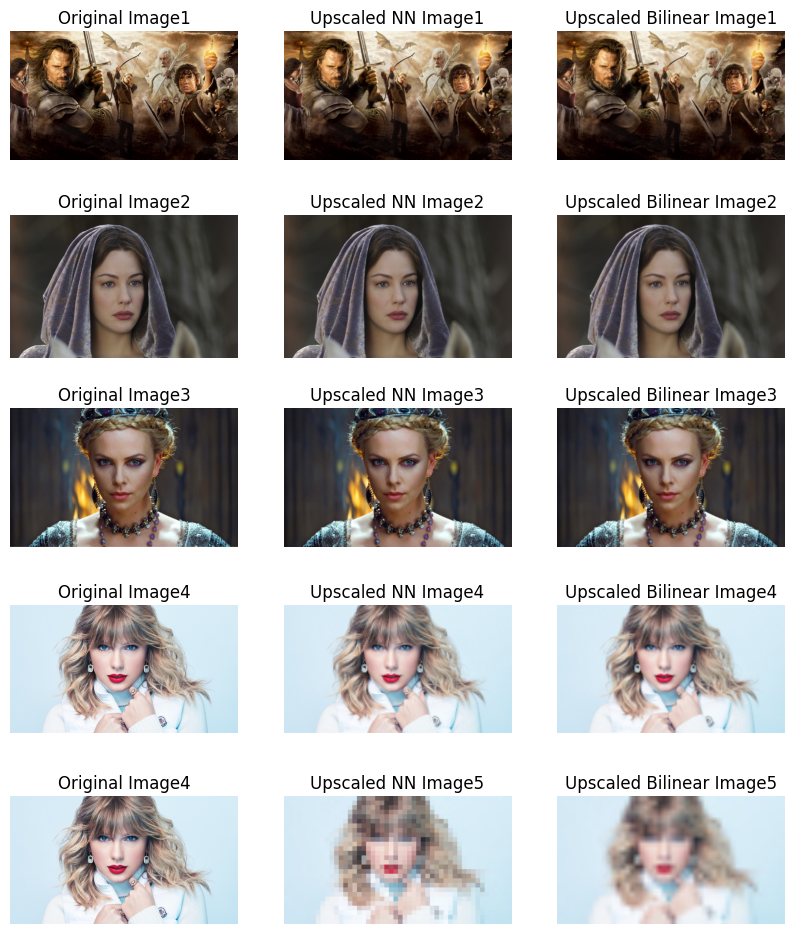

In [139]:
# Load the images
original_image1 = cv2.imread('a1images/a1q5images/im01.png')
original_image2 = cv2.imread('a1images/a1q5images/im02.png')
original_image3 = cv2.imread('a1images/a1q5images/im03.png')
original_image4 = cv2.imread('a1images/a1q5images/taylor.jpg')


small_image1 = cv2.imread('a1images/a1q5images/im01small.png')
small_image2 = cv2.imread('a1images/a1q5images/im02small.png')
small_image3 = cv2.imread('a1images/a1q5images/im03small.png')
small_image4 = cv2.imread('a1images/a1q5images/taylor_small.jpg')

very_small_image4 = cv2.imread('a1images/a1q5images/taylor_very_small.jpg')

# Resize the small image using nearest-neighbor
upscaled_nn_image1 = nearest_neighbor_zoom(small_image1, 4)
upscaled_nn_image2 = nearest_neighbor_zoom(small_image2, 4)
upscaled_nn_image3 = nearest_neighbor_zoom(small_image3, 4)
upscaled_nn_image4 = nearest_neighbor_zoom(small_image4, 5)

# Resize the very small image using nearest-neighbor
upscaled_nn_image5 = nearest_neighbor_zoom(very_small_image4, 20)

# Resize the small image using bilinear interpolation
upscaled_bilinear_image1 = bilinear_zoom(small_image1, 4)
upscaled_bilinear_image2 = bilinear_zoom(small_image2, 4)
upscaled_bilinear_image3 = bilinear_zoom(small_image3, 4)
upscaled_bilinear_image4 = bilinear_zoom(small_image4, 5)

# Resize the very small image using bilinear interpolation
upscaled_bilinear_image5 = bilinear_zoom(very_small_image4, 20)

# Compute normalized SSD between original and upscaled images
ssd_nn1 = compute_normalized_ssd(original_image1, upscaled_nn_image1)
ssd_bilinear1 = compute_normalized_ssd(original_image1, upscaled_bilinear_image1)

ssd_nn2 = compute_normalized_ssd(original_image2, upscaled_nn_image2)
ssd_bilinear2 = compute_normalized_ssd(original_image2, upscaled_bilinear_image2)

ssd_nn3 = compute_normalized_ssd(original_image3, upscaled_nn_image3)
ssd_bilinear3 = compute_normalized_ssd(original_image3, upscaled_bilinear_image3)

ssd_nn4 = compute_normalized_ssd(original_image4, upscaled_nn_image4)
ssd_bilinear4 = compute_normalized_ssd(original_image4, upscaled_bilinear_image4)

ssd_nn5 = compute_normalized_ssd(original_image4, upscaled_nn_image5)
ssd_bilinear5 = compute_normalized_ssd(original_image4, upscaled_bilinear_image5)

# Display the results
print(f"Normalized SSD for nearest-neighbor interpolation for image 1: {ssd_nn1}")
print(f"Normalized SSD for bilinear interpolation for image 1: {ssd_bilinear1}")

print(f"Normalized SSD for nearest-neighbor interpolation for image 2: {ssd_nn2}")
print(f"Normalized SSD for bilinear interpolation for image 2: {ssd_bilinear2}")

print(f"Normalized SSD for nearest-neighbor interpolation for image 3: {ssd_nn3}")
print(f"Normalized SSD for bilinear interpolation for image 3: {ssd_bilinear3}")

print(f"Normalized SSD for nearest-neighbor interpolation for image 4: {ssd_nn4}")
print(f"Normalized SSD for bilinear interpolation for image 4: {ssd_bilinear4}")

print(f"Normalized SSD for nearest-neighbor interpolation for image 5: {ssd_nn5}")
print(f"Normalized SSD for bilinear interpolation for image 5: {ssd_bilinear5}")

# Display images
plt.figure(figsize=(10, 12))

plt.subplot(5, 3, 1)
plt.title("Original Image1")
plt.imshow(cv2.cvtColor(original_image1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(5, 3, 2)
plt.title("Upscaled NN Image1")
plt.imshow(cv2.cvtColor(upscaled_nn_image1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(5, 3, 3)
plt.title("Upscaled Bilinear Image1")
plt.imshow(cv2.cvtColor(upscaled_bilinear_image1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(5, 3, 4)
plt.title("Original Image2")
plt.imshow(cv2.cvtColor(original_image2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(5, 3, 5)
plt.title("Upscaled NN Image2")
plt.imshow(cv2.cvtColor(upscaled_nn_image2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(5, 3, 6)
plt.title("Upscaled Bilinear Image2")
plt.imshow(cv2.cvtColor(upscaled_bilinear_image2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(5, 3, 7)
plt.title("Original Image3")
plt.imshow(cv2.cvtColor(original_image3, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(5, 3, 8)
plt.title("Upscaled NN Image3")
plt.imshow(cv2.cvtColor(upscaled_nn_image3, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(5, 3, 9)
plt.title("Upscaled Bilinear Image3")
plt.imshow(cv2.cvtColor(upscaled_bilinear_image3, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(5, 3, 10)
plt.title("Original Image4")
plt.imshow(cv2.cvtColor(original_image4, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(5, 3, 11)
plt.title("Upscaled NN Image4")
plt.imshow(cv2.cvtColor(upscaled_nn_image4, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(5, 3, 12)
plt.title("Upscaled Bilinear Image4")
plt.imshow(cv2.cvtColor(upscaled_bilinear_image4, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(5, 3, 13)
plt.title("Original Image4")
plt.imshow(cv2.cvtColor(original_image4, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(5, 3, 14)
plt.title("Upscaled NN Image5")
plt.imshow(cv2.cvtColor(upscaled_nn_image5, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(5, 3, 15)
plt.title("Upscaled Bilinear Image5")
plt.imshow(cv2.cvtColor(upscaled_bilinear_image5, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


#### 9

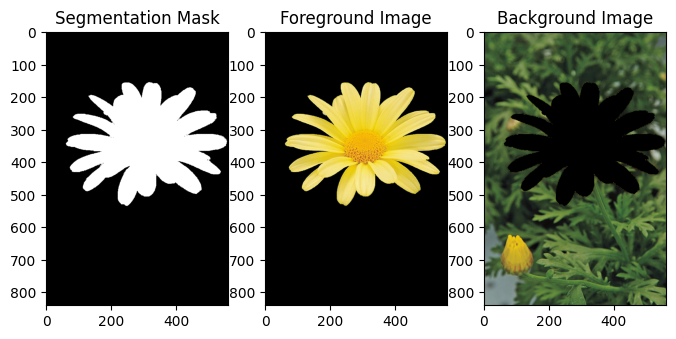

In [140]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img_flower = cv2.imread('a1images/daisy.jpg')

mask = np.zeros(img_flower.shape[:2], np.uint8)
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)
rect = (50, 100, 600, 500)  # Coordinates for the rectangle

# Apply grabCut algorithm
cv2.grabCut(img_flower, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

# Create binary mask for foreground
mask_foreground = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Extract the foreground
foreground_img = img_flower * mask_foreground[:, :, np.newaxis]

# Extract the background
background_img = img_flower * (1 - mask_foreground[:, :, np.newaxis])

# Plot the results
plt.figure(figsize=(8, 5))

plt.subplot(1, 3, 1)
plt.imshow(mask_foreground, cmap='gray')
plt.title('Segmentation Mask')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(foreground_img, cv2.COLOR_BGR2RGB))
plt.title('Foreground Image')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(background_img, cv2.COLOR_BGR2RGB))
plt.title('Background Image')

plt.show()


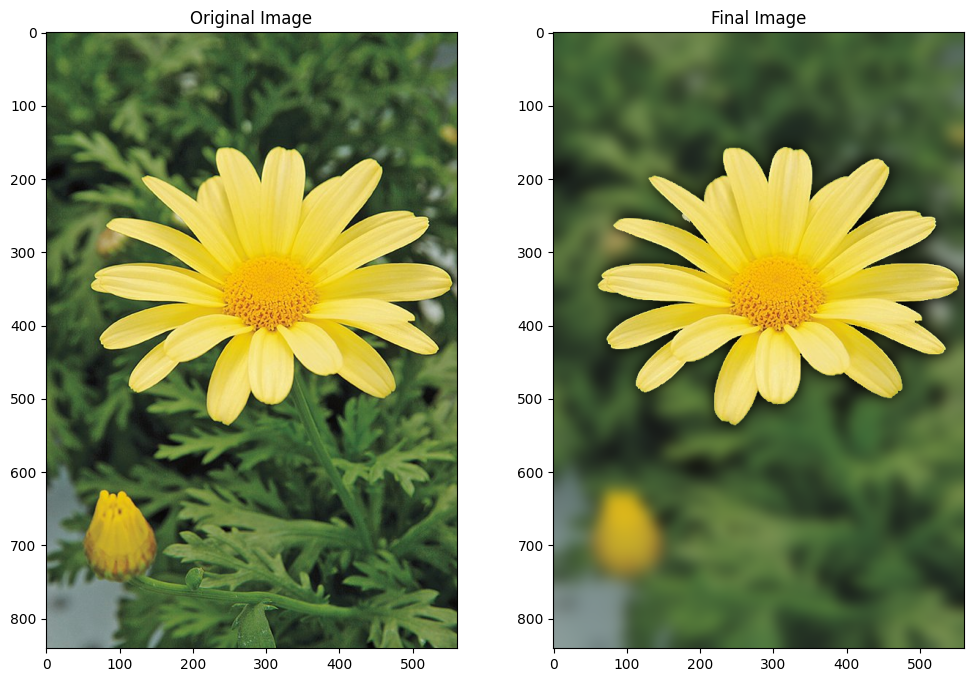

In [198]:
# Apply Gaussian blur to the background
blurred_background = cv2.GaussianBlur(background_img, (63, 63), 0)

# Combine blurred background and the foreground
final_img = blurred_background * (1 - mask_foreground[:, :, np.newaxis]) + foreground_img

# Plot the original and enhanced images
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_flower, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB))
plt.title('Final Image')

plt.show()


The Gaussian blur kernel uses neighboring dark pixels to compute the new pixel value, so they also influence the filtering.